# revision

# exo 1

In [1]:
import turtle as tu

tot = tu.Turtle()

def line(nb):
    tot.up()
    tot.speed(1)
    u=1
    for i in range(nb):
        tot.color('black')
        tot.write(u * '^')
        u=u+2
        if i%2:
            tot.forward(5)
            tot.left(90)
            tot.forward(10)
            tot.left(90)
        else :
            tot.backward(5)
            tot.right(90)
            tot.forward(10)
            tot.right(90)

nb = 12
line(nb)
        
        

tu.exitonclick()

# exo 2

In [1]:
import turtle as tu

tot = tu.Turtle()

def carre(cote):
    for i in range(4):
        tot.forward(cote)
        tot.left(90)


carre(80)
tot.forward(20)
tot.color('red')
carre(40)
tot.color('black')
tot.forward(60)
tot.left(90)
tot.forward(80)
tot.color('blue')
tot.left(30)
tot.forward(80)
tot.left(120)
tot.forward(80)

tu.exitonclick()


# Exo gui

In [19]:
from easygui import *

choice = ''
nbPizz = 0

def firstScreen():
    global choice
    msg ="Quel est votre type de nourriture favori ?"
    title = ""
    choices = ("Asian", "Estern", "Western")
    choice = choicebox(msg, title, choices)
    
def AsianChoice():
    global choice
    msg ="Avec quel base?"
    title = ""
    choices = ("Riz", "Noodle")
    choiceAsian = choicebox(msg, title, choices)
    
def EsternChoice():
    global choice
    msg ="Es ce que vous voulez manger vegan ?"
    title = ""
    choices = ("Oui", "Non")
    choiceEstern = choicebox(msg, title, choices)
    
def WesternChoice():
    global choice
    msg ="Quel type d'origine de cuisine?"
    title = ""
    choices = ("Francaise", "Italienne")
    choiceWestern = choicebox(msg, title, choices)

firstScreen()
if choice == "Asian" :
    AsianChoice()
if choice == "Estern" :
    EsternChoice()
if choice == "Western" :
    WesternChoice()


[0]
[0]


# Exo voiture

In [1]:
from pyDatalog import pyDatalog
pyDatalog.clear()
pyDatalog.create_terms('X,x,Y,y,sep,hasWin,hasNotWin,hasPodium,hasNotPodium,endBefore,notFollow,separate,rank')

hasWin(X) <= (rank[X] == x) & (x==1)
hasNotWin (X) <= (rank[X] == x) & (x!=1)
hasPodium (X) <= (rank[X] == x) & (x<=3)
hasNotPodium (X) <= (rank[X] == x) & (x>3)
endBefore(X,Y)<= (rank[X] == x) & (rank[Y] == y) & (x<y)
notFollow(X,Y)<= (rank[X] == x) & (rank[Y] == y) & (x!=y+1) & (y!=x+1)
separate(X,Y,sep)<= ((rank[X] == x) & (rank[Y] == y)) & ((x==y+sep) or (x==y-sep))

+hasNotWin("vert")
+endBefore("vert","bleu")
+hasNotPodium("bleu")

+separate("bleu","jaune",2)

+endBefore("rouge","violette")
+separate("rouge","violette",1)

+notFollow("jaune","rouge")

# print(hasWin(X))


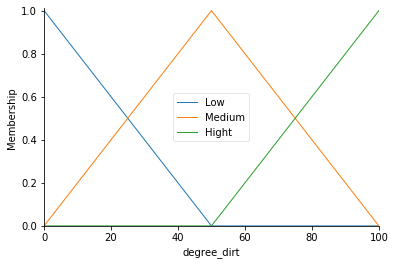

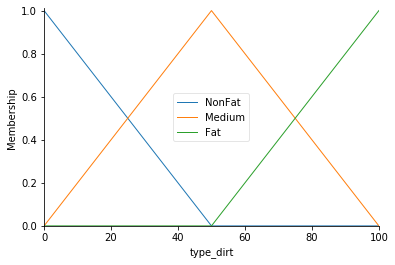

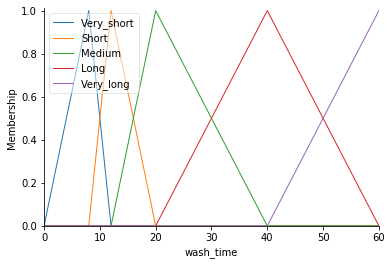

In [30]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

degree_dirt = ctrl.Antecedent(np.arange(0,101,1),'degree_dirt')
degree_names=['Low','Medium','Hight']
type_dirt = ctrl.Antecedent(np.arange(0,101,1),'type_dirt')
dirt_names=['NonFat','Medium','Fat']
wash_time = ctrl.Consequent(np.arange(0,61,1),'wash_time')

wash_time['Very_short']=fuzz.trimf(wash_time.universe,[0,8,12])
wash_time['Short']=fuzz.trimf(wash_time.universe,[8,12,20])
wash_time['Medium']=fuzz.trimf(wash_time.universe,[12,20,40])
wash_time['Long']=fuzz.trimf(wash_time.universe,[20,40,60])
wash_time['Very_long']=fuzz.trimf(wash_time.universe,[40,60,60])


degree_dirt.automf(names=degree_names)
type_dirt.automf(names=dirt_names)

degree_dirt.view()
type_dirt.view()
wash_time.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e21b3de3c8>)

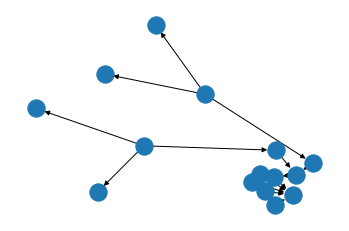

In [31]:
#degree_dirt
#type_dirt
rule1 = ctrl.Rule(degree_dirt['Hight'] | type_dirt['Fat'],wash_time['Very_long'])
rule2 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['Fat'],wash_time['Long'])
rule3 = ctrl.Rule(degree_dirt['Low'] | type_dirt['Fat'],wash_time['Long'])
rule4 = ctrl.Rule(degree_dirt['Hight'] | type_dirt['Medium'],wash_time['Long'])
rule5 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['Medium'],wash_time['Medium'])
rule6 = ctrl.Rule(degree_dirt['Low'] | type_dirt['Medium'],wash_time['Medium'])
rule7 = ctrl.Rule(degree_dirt['Hight'] | type_dirt['NonFat'],wash_time['Medium'])
rule8 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['NonFat'],wash_time['Short'])
rule9 = ctrl.Rule(degree_dirt['Low'] | type_dirt['NonFat'],wash_time['Very_short'])

rule1.view()


28.84226190476189


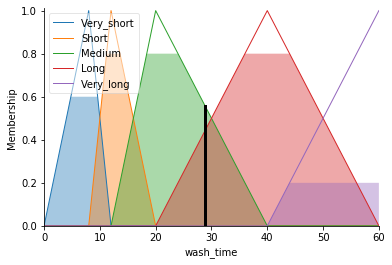

In [32]:
#degree_dirt
#type_dirt

wash_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
washControl = ctrl.ControlSystemSimulation(wash_ctrl)

washControl.input['degree_dirt']=60
washControl.input['type_dirt']=20

washControl.compute()

print(washControl.output['wash_time'])
wash_time.view(sim=washControl)